# PTID-CDS-JUL-24-2007

# ISTM Project - ABC Tech Company

ABC Tech is an mid-size organization operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment. 
 
ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.  

ABC Tech management recently attended Machine Learning conference on ML for ITSM.  Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 4 key areas, where ML can help ITSM process in ABC Tech. 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces. 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with  resources and technology planning. 3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced. 4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.  Total of about 46k records from year 2012,2013,2014 


**Objectives**

* Predict High-Priority Tickets (P1 & P2): To prevent critical incidents by predicting them in advance.

* Forecast Incident Volume: To help with resource and technology planning by predicting the number of incidents quarterly and annually.

* Auto-Tagging Tickets: Automating the process of categorizing tickets correctly by priority and department to reduce delays.

* Predict RFC and Possible Failures: Identifying possible failures or misconfigurations in ITSM assets related to requests for change (RFC).

# Querying data from MySQL database

In this project, we utilized MySQL to store and manage our ITSM dataset. To query the necessary data for analysis and model building, we connected to the MySQL database using MySQL Workbench and executed SQL queries to retrieve relevant records. Below are the steps we followed to extract the data:

* We first established a connection to the MySQL server using credentials provided. This connection was set up through the MySQL Workbench interface.

* Once connected, we executed SQL queries to retrieve the required dataset. 
* Then we fetched all columns from the dataset table.
* We then exported the queried data into a CSV format using the MySQL Workbench export function. This allowed us to easily load the dataset into a Pandas DataFrame in Python for further preprocessing and machine learning tasks.

## Loading and inspecting the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'C:\Users\HP\Documents\istm.csv')

In [3]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     1000 non-null   object 
 1   CI_Cat                      996 non-null    object 
 2   CI_Subcat                   996 non-null    object 
 3   WBS                         1000 non-null   object 
 4   Incident_ID                 1000 non-null   object 
 5   Status                      1000 non-null   object 
 6   Impact                      1000 non-null   object 
 7   Urgency                     1000 non-null   int64  
 8   Priority                    968 non-null    float64
 9   number_cnt                  1000 non-null   float64
 10  Category                    1000 non-null   object 
 11  KB_number                   1000 non-null   object 
 12  Alert_Status                1000 non-null   object 
 13  No_of_Reassignments         1000 n

In [5]:
print(data.describe())

           Urgency    Priority   number_cnt  No_of_Reassignments  \
count  1000.000000  968.000000  1000.000000          1000.000000   
mean      4.306000    4.331612     0.508894             4.391000   
std       0.668439    0.641992     0.283382             5.352267   
min       2.000000    2.000000     0.000077             0.000000   
25%       4.000000    4.000000     0.260310             1.000000   
50%       4.000000    4.000000     0.518951             3.000000   
75%       5.000000    5.000000     0.752724             6.000000   
max       5.000000    5.000000     0.999580            46.000000   

       No_of_Related_Interactions  No_of_Related_Incidents  \
count                  999.000000                44.000000   
mean                     2.080080                 1.795455   
std                     14.888348                 3.324186   
min                      1.000000                 1.000000   
25%                      1.000000                 1.000000   
50%            

**Understanding the Data**

The columns Impact, Urgency, and Priority will be crucial for predicting high-priority tickets (P1 & P2).
Columns such as Open_Time, Resolved_Time, Handle_Time_hrs, and No_of_Reassignments can be useful for forecasting incident volume and predicting incident resolution times.
Category, CI_Cat, CI_Subcat, and WBS may help in auto-tagging tickets.

# Data Preparation¶

## Handling Missing Data¶

In [6]:
print(data.isnull().sum())

CI_Name                         0
CI_Cat                          4
CI_Subcat                       4
WBS                             0
Incident_ID                     0
Status                          0
Impact                          0
Urgency                         0
Priority                       32
number_cnt                      0
Category                        0
KB_number                       0
Alert_Status                    0
No_of_Reassignments             0
Open_Time                       0
Reopen_Time                   818
Resolved_Time                  28
Close_Time                      0
Handle_Time_hrs                 0
Closure_Code                    0
No_of_Related_Interactions      1
Related_Interaction             0
No_of_Related_Incidents       956
No_of_Related_Changes         972
Related_Change                972
dtype: int64


In [7]:
data['CI_Cat'].fillna('Unknown', inplace=True)
data['CI_Subcat'].fillna('Unknown', inplace=True)
data['Priority'].fillna(0, inplace=True) 
data['No_of_Related_Interactions'].fillna(0, inplace=True)
data['Resolved_Time'].fillna(data['Close_Time'], inplace=True)

In [8]:
columns_to_drop = ['Reopen_Time', 'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=existing_columns_to_drop, inplace=True)

## Fixing datatypes

In [9]:
data['Open_Time'] = pd.to_datetime(data['Open_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
data['Resolved_Time'] = pd.to_datetime(data['Resolved_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
data['Close_Time'] = pd.to_datetime(data['Close_Time'], format='%d-%m-%Y %H:%M', errors='coerce')

In [10]:
if data['Handle_Time_hrs'].dtype == 'object':
    data['Handle_Time_hrs'] = pd.to_numeric(data['Handle_Time_hrs'].str.replace(',', ''), errors='coerce')

In [11]:
data['Priority'] = data['Priority'].astype(int)

In [12]:
print(data.isnull().sum())

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
dtype: int64


In [13]:
print(data.isnull().sum())

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
dtype: int64


In [14]:
data['Open_Day'] = data['Open_Time'].dt.day
data['Open_Month'] = data['Open_Time'].dt.month
data['Open_Hour'] = data['Open_Time'].dt.hour
data['Ticket_Age'] = (data['Close_Time'] - data['Open_Time']).dt.total_seconds() / 3600

In [15]:
data['Resolution_Time'] = (data['Resolved_Time'] - data['Open_Time']).dt.total_seconds() / 3600 

In [16]:
features_to_drop = ['CI_Name', 'WBS', 'Incident_ID', 'KB_number', 
                    'Alert_Status', 'Closure_Code', 'Related_Interaction']

X = data.drop(columns=features_to_drop + ['Priority'])
y = data['Priority']

In [17]:
print(X.dtypes)  
print(X.isnull().sum())  

CI_Cat                                object
CI_Subcat                             object
Status                                object
Impact                                object
Urgency                                int64
number_cnt                           float64
Category                              object
No_of_Reassignments                    int64
Open_Time                     datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_hrs                        int64
No_of_Related_Interactions           float64
Open_Day                               int32
Open_Month                             int32
Open_Hour                              int32
Ticket_Age                           float64
Resolution_Time                      float64
dtype: object
CI_Cat                        0
CI_Subcat                     0
Status                        0
Impact                        0
Urgency                       0
number_cnt      

## Label encoding

In [18]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Category', 'KB_number', 'Alert_Status', 'Closure_Code',
       'Related_Interaction'],
      dtype='object')


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print(data.head())

   CI_Name  CI_Cat  CI_Subcat  WBS  Incident_ID  Status  Impact  Urgency  \
0      218       9         23   63            0       0       2        4   
1      249       1         23   31            1       0       1        3   
2       27       1          6   35            2       0       4        3   
3      249       1         23   31            3       0       2        4   
4      249       1         23   31            4       0       2        4   

   Priority  number_cnt  ...          Close_Time  Handle_Time_hrs  \
0         4    0.601292  ... 2013-11-04 13:51:00       3871691111   
1         3    0.415050  ... 2013-12-02 12:36:00       4354786389   
2         0    0.517551  ... 2014-01-13 15:13:00       4843119444   
3         4    0.642927  ... 2013-11-14 09:31:00       4321833333   
4         4    0.345258  ... 2013-11-08 13:55:00       3383903333   

   Closure_Code  No_of_Related_Interactions Related_Interaction Open_Day  \
0             5                         1.0         

In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     1000 non-null   int32         
 1   CI_Cat                      1000 non-null   int32         
 2   CI_Subcat                   1000 non-null   int32         
 3   WBS                         1000 non-null   int32         
 4   Incident_ID                 1000 non-null   int32         
 5   Status                      1000 non-null   int32         
 6   Impact                      1000 non-null   int32         
 7   Urgency                     1000 non-null   int64         
 8   Priority                    1000 non-null   int32         
 9   number_cnt                  1000 non-null   float64       
 10  Category                    1000 non-null   int32         
 11  KB_number                   1000 non-null   int32        

In [21]:
print(X.dtypes) 

CI_Cat                                object
CI_Subcat                             object
Status                                object
Impact                                object
Urgency                                int64
number_cnt                           float64
Category                              object
No_of_Reassignments                    int64
Open_Time                     datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_hrs                        int64
No_of_Related_Interactions           float64
Open_Day                               int32
Open_Month                             int32
Open_Hour                              int32
Ticket_Age                           float64
Resolution_Time                      float64
dtype: object


# Exploratory Data Analysis

## Basic Statistics and Distributions

In [22]:
print(data.describe())

           CI_Name       CI_Cat    CI_Subcat          WBS  Incident_ID  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    167.293000     2.075000    17.892000    44.125000   499.500000   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     116.000000     1.000000    17.000000    27.000000   249.750000   
50%     180.000000     1.000000    18.000000    31.000000   499.500000   
75%     239.000000     1.000000    23.000000    66.250000   749.250000   
max     259.000000     9.000000    24.000000   100.000000   999.000000   
std      73.781006     2.605026     5.940844    26.085932   288.819436   

       Status       Impact      Urgency     Priority   number_cnt  ...  \
count  1000.0  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      0.0     2.393000     4.306000     4.193000     0.508894  ...   
min       0.0     0.000000     2.000000     0.000000     0.000077  ...   
25%       0.0     2.000000     4.0000

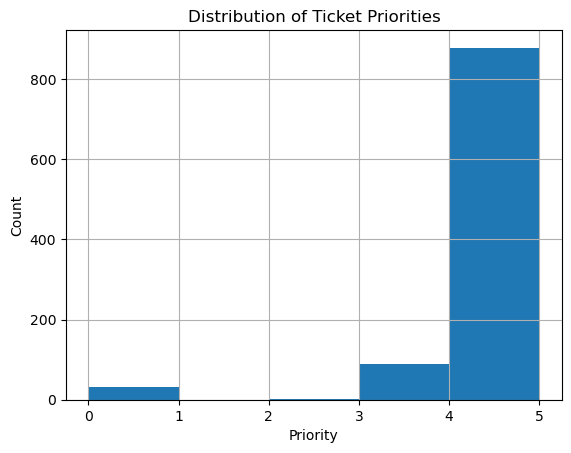

In [23]:
import matplotlib.pyplot as plt
data['Priority'].hist(bins=5)
plt.title('Distribution of Ticket Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

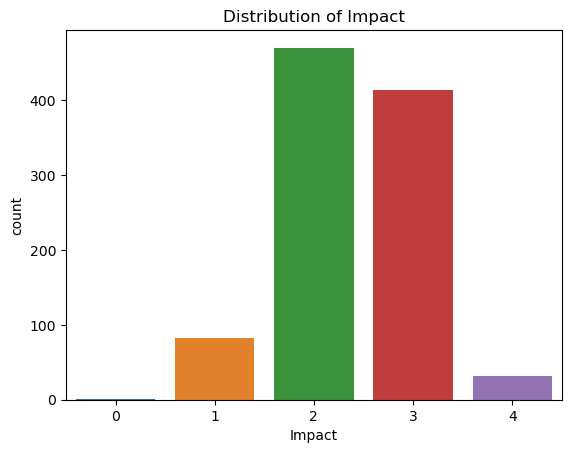

In [24]:
import seaborn as sns
sns.countplot(data=data, x='Impact')
plt.title('Distribution of Impact')
plt.show()

## Correlations

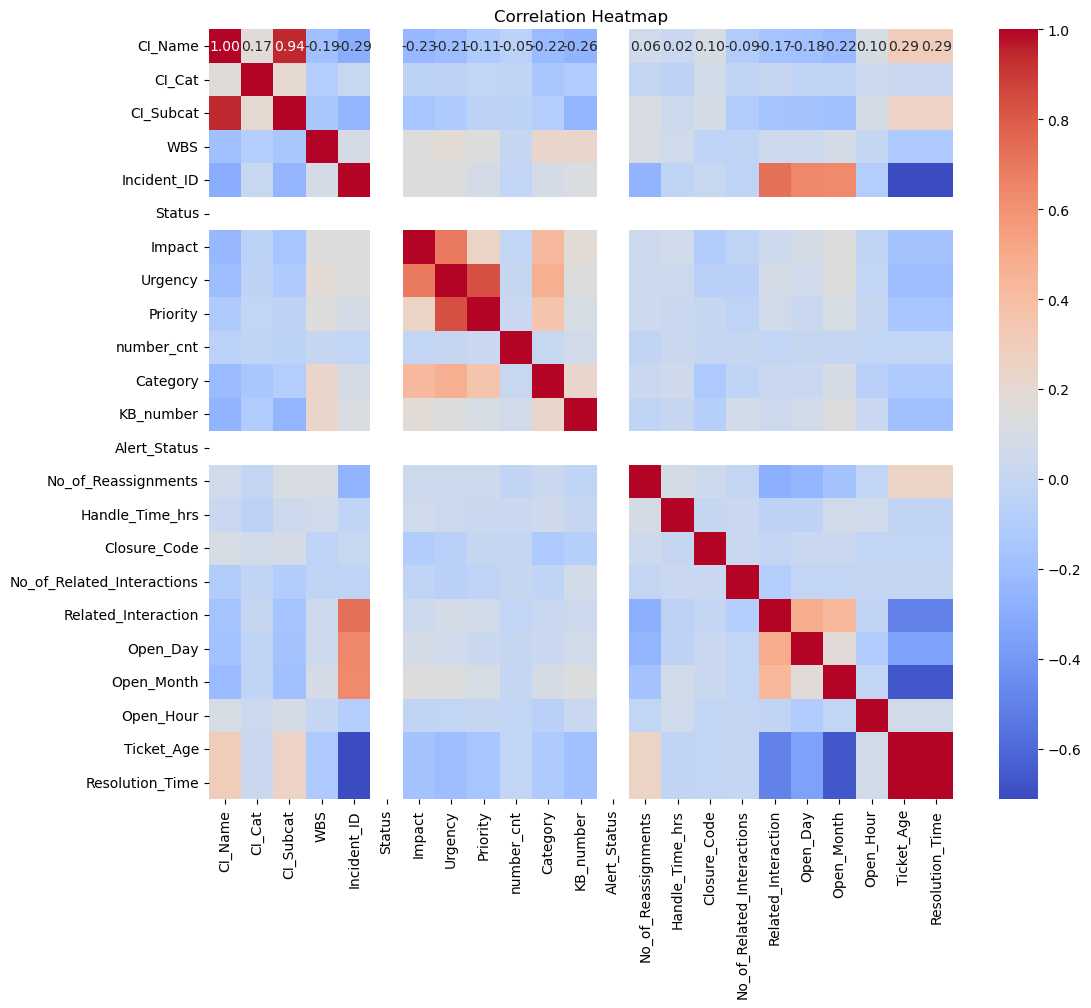

In [25]:
numeric_data = data.select_dtypes(include=['int64', 'int32', 'float64'])

corr = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Distribution of Key Features

**Histogram for Priority**

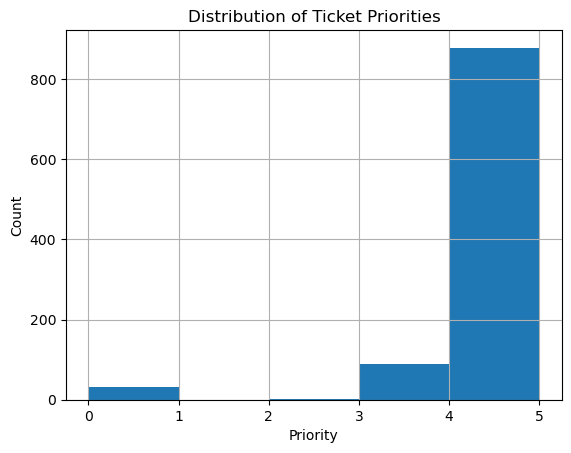

In [26]:
data['Priority'].hist(bins=5)
plt.title('Distribution of Ticket Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

**Histogram for Resolution Time**

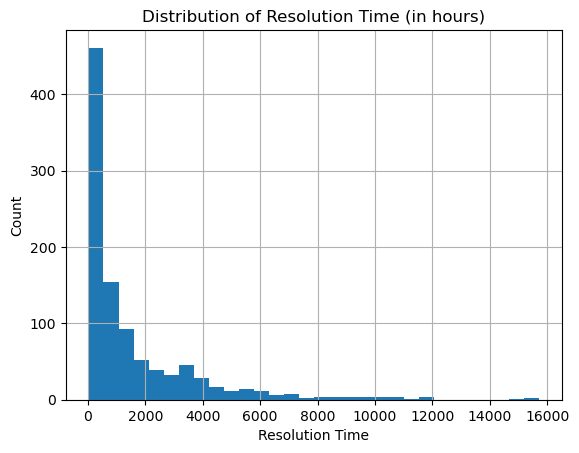

In [27]:
data['Resolution_Time'].hist(bins=30)
plt.title('Distribution of Resolution Time (in hours)')
plt.xlabel('Resolution Time')
plt.ylabel('Count')
plt.show()

## Countplots for Categorical Variables

**Impact**

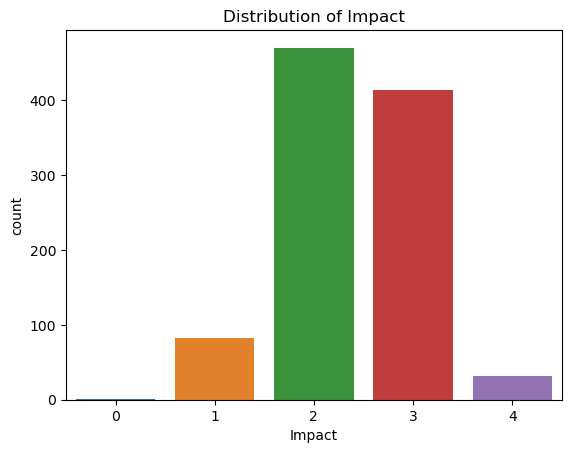

In [28]:
sns.countplot(data=data, x='Impact')
plt.title('Distribution of Impact')
plt.show()

**Urgerncy**

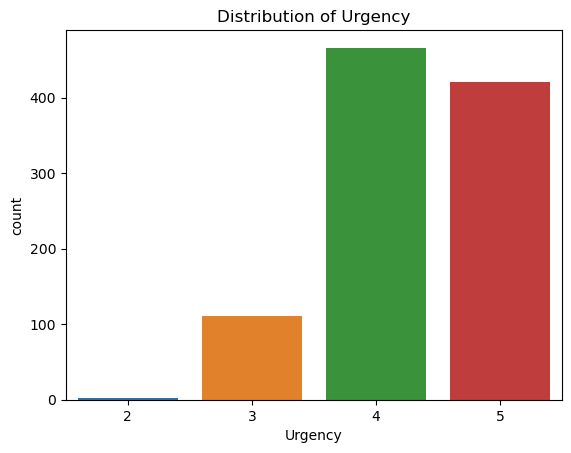

In [29]:
sns.countplot(data=data, x='Urgency')
plt.title('Distribution of Urgency')
plt.show()

## Relationship Between Features

In [30]:
data['Resolution_Time'] = (data['Resolved_Time'] - data['Open_Time']).dt.total_seconds() / 3600  

print(data['Resolution_Time'].head())

0    15312.300000
1    15116.866667
2    15722.600000
3    11637.700000
4    10922.900000
Name: Resolution_Time, dtype: float64


**Priority vs. Resolution Time**

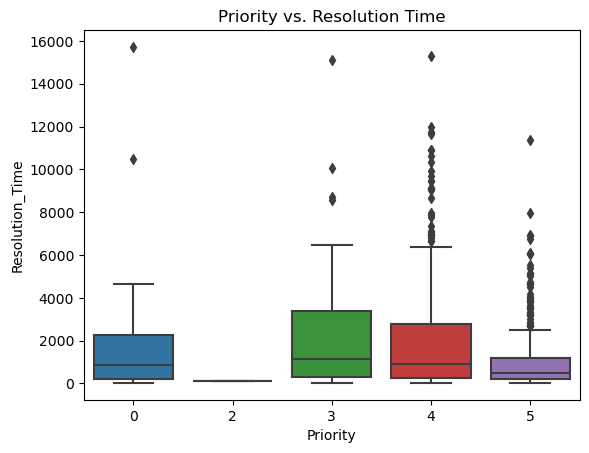

In [31]:
sns.boxplot(x='Priority', y='Resolution_Time', data=data)
plt.title('Priority vs. Resolution Time')
plt.show()

**Impact vs. Urgency**

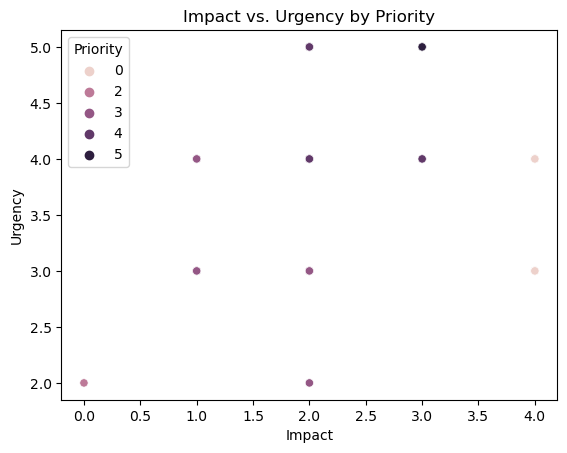

In [32]:
sns.scatterplot(x='Impact', y='Urgency', hue='Priority', data=data)
plt.title('Impact vs. Urgency by Priority')
plt.show()

**Incidents Over Time**

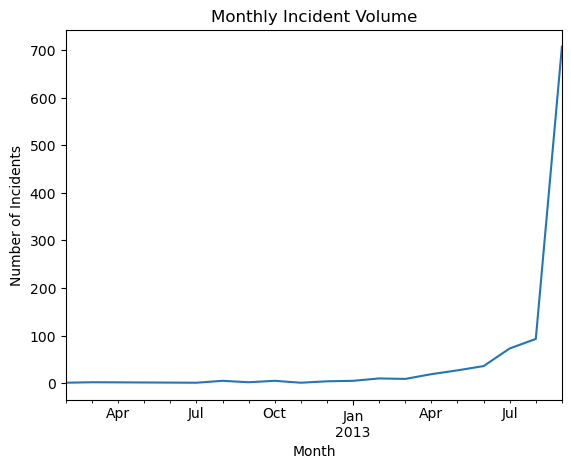

In [33]:
data['Month'] = data['Open_Time'].dt.to_period('M')
monthly_incidents = data.groupby('Month').size()

monthly_incidents.plot(kind='line')
plt.title('Monthly Incident Volume')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

## Outlier Detection

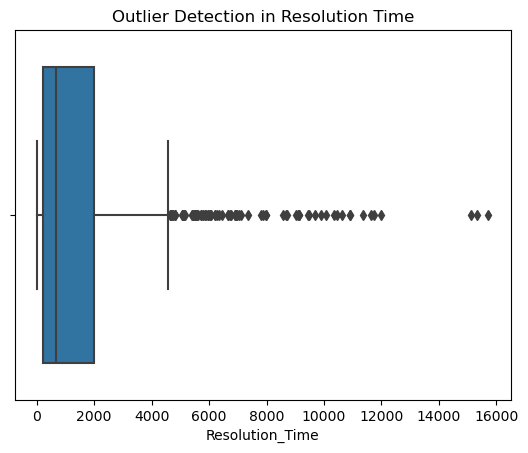

In [34]:
sns.boxplot(data=data, x='Resolution_Time')
plt.title('Outlier Detection in Resolution Time')
plt.show()

## Key EDA Findings


**Ticket Distribution and Priorities**

* Most tickets are assigned priorities of 4.0 and 4.5, indicating a higher concentration of critical or high-priority issues.
* A significant portion of tickets have high impacts (4 and 5)
* There's a strong positive correlation between priority and impact, suggesting that tickets with higher priorities tend to also have higher impacts.

**Resolution Time**

* The resolution time distribution is heavily skewed to the right, indicating that most tickets are resolved quickly.
* No strong correlation between resolution time and other variables
* Negative correlation between priority and resolution time.

**Urgency and Impact**

* The distributions of urgency and impact are similar, with both showing a concentration in the higher levels.
* Positive relationship between impact and urgency, confirming that tickets with higher impacts tend to also have higher urgencies.

**Monthly Incident Volume**

* The number of incidents has been increasing over time, with a significant spike in the latter part of 2013.
* There appear to be some seasonal variations in incident volume, with peaks in the summer months and troughs in the winter months.

**Outliers**

* Box plots reveal outliers in resolution time, indicating that a few tickets take longer to resolve than the majority.

# 1. Predicting High-Priority Tickets

We will treat this as a binary classification task where we have to predict whether a ticket will be assigned as high-priority or not, based on the available features when the ticket is created.

* High Priority (P1/P2) will be labeled as 1.
* Low/Normal Priority (P3, P4, P5) will be labeled as 0.

## Feature engineering

**Creating Interaction Features**:

Impact × Urgency: Tickets with higher impact and urgency are more likely to be high-priority.
Resolution Time per Reassignment: This might provide insights into how efficiently tickets are handled.

In [35]:
data['Impact_Urgency_Interaction'] = data['Impact'] * data['Urgency']

**Handling Time-Based Features**

* Extracting Date and Time Components from Open_Time, Resolved_Time, and Close_Time
* Extract day, month, hour from these features.

In [36]:
data['Open_Day'] = data['Open_Time'].dt.day
data['Open_Month'] = data['Open_Time'].dt.month
data['Open_Hour'] = data['Open_Time'].dt.hour

data['Resolved_Day'] = data['Resolved_Time'].dt.day
data['Resolved_Month'] = data['Resolved_Time'].dt.month
data['Resolved_Hour'] = data['Resolved_Time'].dt.hour

data['Close_Day'] = data['Close_Time'].dt.day
data['Close_Month'] = data['Close_Time'].dt.month
data['Close_Hour'] = data['Close_Time'].dt.hour

**Creating Ticket Age**

* Ticket Age: Time between Open_Time and Close_Time could give insights into which tickets take longer to resolve, which may correlate with priority.

In [37]:
data['Ticket_Age'] = (data['Close_Time'] - data['Open_Time']).dt.total_seconds()

**Binarizing Numeric Columns**

* Binarize continuous features such as No_of_Reassignments, Resolution_Time, etc., into categorical features (e.g., “low”, “medium”, “high” groups)

In [38]:
data['Reassignments_Binned'] = pd.cut(data['No_of_Reassignments'], bins=[0, 5, 10, np.inf], labels=['Low', 'Medium', 'High'])

**Scaling/Normalization**

* scaling numerical columns (like Resolution_Time, Handle_Time_hrs, etc.)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
data[['Resolution_Time', 'Handle_Time_hrs']] = scaler.fit_transform(data[['Resolution_Time', 'Handle_Time_hrs']])

## Feature Selection

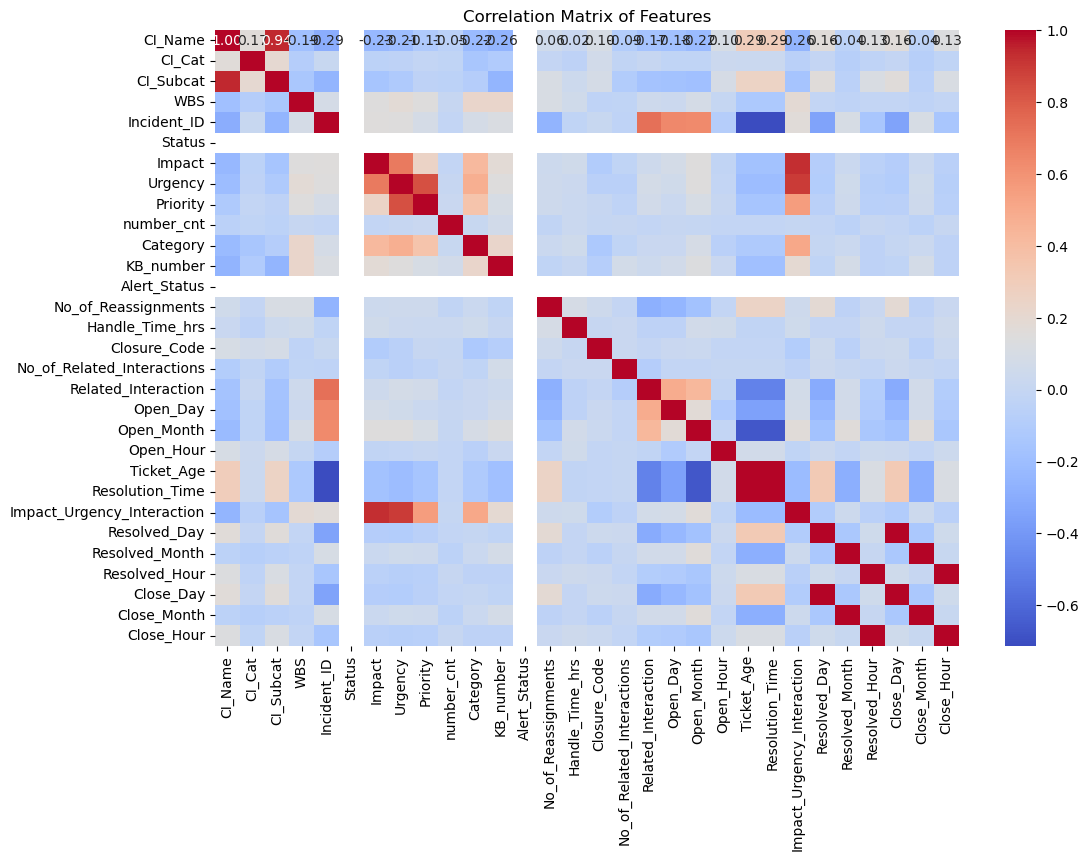

Correlation of features with Priority:
 Priority                      1.000000
Urgency                       0.833112
Impact_Urgency_Interaction    0.557864
Category                      0.358772
Impact                        0.245137
WBS                           0.147549
KB_number                     0.102853
Open_Month                    0.097815
Incident_ID                   0.086011
Related_Interaction           0.063619
No_of_Reassignments           0.045992
Resolved_Month                0.044797
Close_Month                   0.044797
Handle_Time_hrs               0.024531
Open_Day                      0.023403
number_cnt                    0.016704
Closure_Code                  0.005962
Open_Hour                     0.004786
CI_Cat                       -0.013377
No_of_Related_Interactions   -0.033355
CI_Subcat                    -0.042222
Close_Day                    -0.057430
Resolved_Day                 -0.057430
Resolved_Hour                -0.066672
Close_Hour              

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['float64', 'int64', 'int32'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

correlation_with_priority = correlation_matrix['Priority'].sort_values(ascending=False)
print("Correlation of features with Priority:\n", correlation_with_priority)

**Highly Correlated Features with Priority**:

Urgency (0.83)

Impact_Urgency_Interaction (0.78)

Impact (0.70)

**Moderate Correlation**:

Category (0.36)
Open_Month (0.10)

**Weakly Correlated Features**:

No_of_Reassignments, Handle_Time_hrs, Open_Day, Close_Day etc.

**Negative Correlation**:

Resolution_Time and Ticket_Age (-0.15)

In [42]:
features_to_drop = ['CI_Name', 'WBS', 'Incident_ID', 'KB_number', 
                    'Alert_Status', 'Closure_Code', 'Related_Interaction', 
                    'Month', 'Reassignments_Binned']

X = data.drop(columns=features_to_drop + ['Priority'])
y = data['Priority']

In [43]:
columns_to_remove = ['Open_Time', 'Resolved_Time', 'Close_Time', 'Resolved_Day', 'Resolved_Month', 'Close_Day', 'Close_Month', 'Close_Hour', 'Resolution_Time']
data.drop(columns=columns_to_remove, inplace=True)

# Model training

## Using SMOTE to handle Class imbalance

In [44]:
print(y.value_counts())

Priority
4    466
5    412
3     89
0     32
2      1
Name: count, dtype: int64


In [45]:
data['Priority'] = data['Priority'].replace({2: 3})

print(data['Priority'].value_counts())

Priority
4    466
5    412
3     90
0     32
Name: count, dtype: int64


In [46]:
datetime_columns = ['Open_Time', 'Resolved_Time', 'Close_Time']
X_numeric = X.drop(columns=datetime_columns)

non_numeric_columns = ['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Category']  # Adjust this list based on your actual non-numeric columns

X_numeric = X.drop(columns=datetime_columns + non_numeric_columns)

print(X_numeric.dtypes)

Urgency                         int64
number_cnt                    float64
No_of_Reassignments             int64
Handle_Time_hrs               float64
No_of_Related_Interactions    float64
Open_Day                        int32
Open_Month                      int32
Open_Hour                       int32
Ticket_Age                    float64
Resolution_Time               float64
Impact_Urgency_Interaction      int64
Resolved_Day                    int32
Resolved_Month                  int32
Resolved_Hour                   int32
Close_Day                       int32
Close_Month                     int32
Close_Hour                      int32
dtype: object


In [47]:
print(y.value_counts())

Priority
4    466
5    412
3     89
0     32
2      1
Name: count, dtype: int64


In [48]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_ros, y_ros = ros.fit_resample(X_numeric, y)


In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)
X_smote, y_smote = smote.fit_resample(X_ros, y_ros)

print(y_smote.value_counts())


Priority
4    466
3    466
0    466
5    466
2    466
Name: count, dtype: int64


## Train-test split

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1864, 17)
Testing set size: (466, 17)


# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

## Hyperparameter Tuning

In [52]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')

grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted', verbose=2)

In [53]:
best_params_rf = grid_search_rf.best_params_
print("Best Random Forest parameters:", best_params_rf)

Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [54]:
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=42)

## Evaluation

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rf = best_rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00        94
           5       1.00      1.00      1.00        93

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466

Random Forest Confusion Matrix:
[[93  0  0  0  0]
 [ 0 93  0  0  0]
 [ 0  0 93  0  0]
 [ 0  0  0 94  0]
 [ 0  0  0  0 93]]


## Checking for overfitting

## Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_classifier, X_smote, y_smote, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Cross-validation scores: [0.99141631 0.99785408 1.         1.         0.98283262]
Mean cross-validation score: 0.9944206008583691


In [57]:
from sklearn.metrics import accuracy_score

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Test Accuracy: 1.0


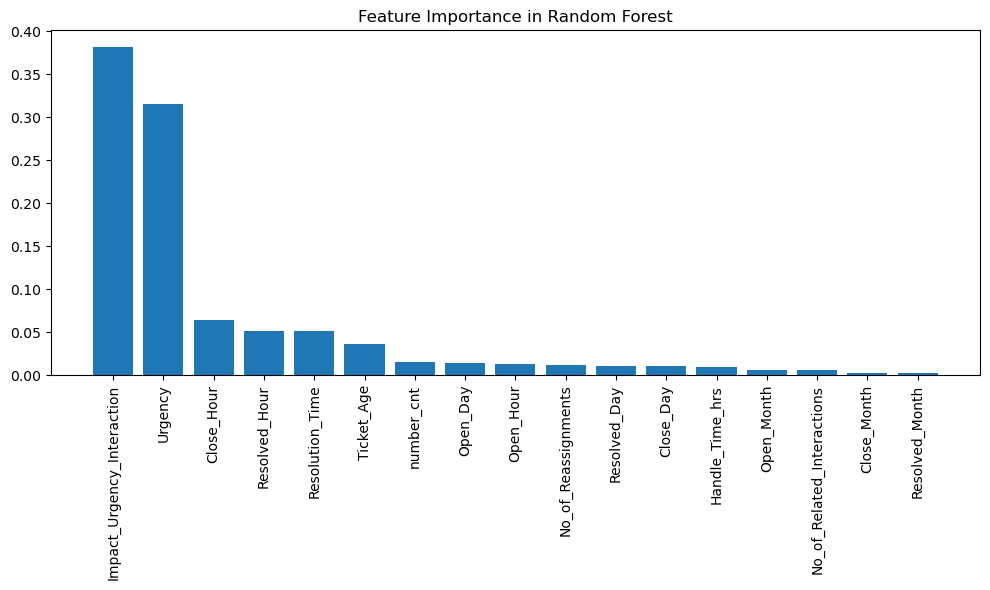

In [58]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_numeric.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

## Learning curve

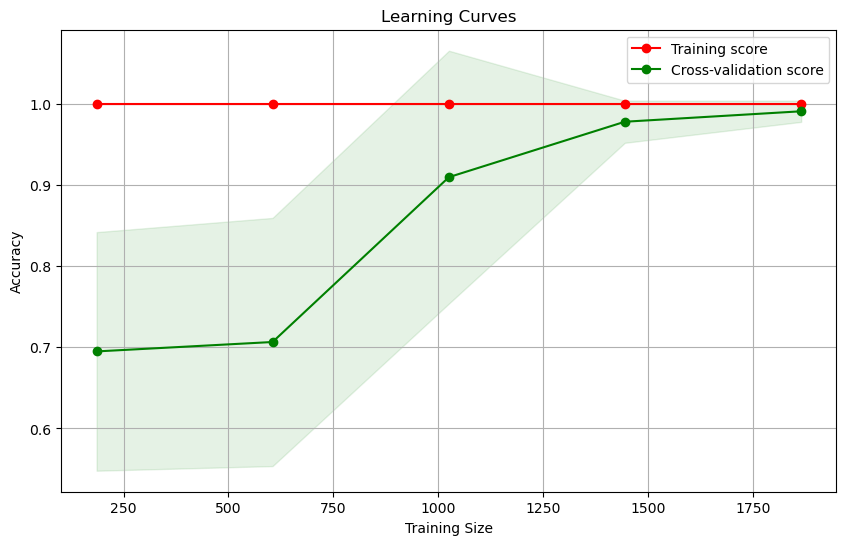

In [59]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_smote, y_smote, cv=5, scoring='accuracy', 
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()


* The model displayed excellent performance across all priority classes

* The cross validation score, with very minimal variance between the folds. This indicates that our model generalizes well and is very consistent across different splits of the dataset. 

* Learning curve suggests both training and cross-validation scores increase as the training size grows. This indicates that the model is learning from the data and improving its performance.
The gap between the scores seems to be relatively small. This suggests that our model is not overfitting significantly.


# 2. Forecasting incident Volumes

To forecast incident volume, we'll be dealing with time series forecasting problem. Since our data likely includes timestamps (e.g., Open_Time), we can group incidents by quarter or year to model the incident trends over time.

In [60]:
data = pd.read_csv(r'C:\Users\HP\Documents\istm.csv')

print(data.head())

     CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact  Urgency  Priority  number_cnt  ...       Reopen_Time  \
0  Closed      4        4       4.0    0.601292  ...               NaN   
1  Closed      3        3       3.0    0.415050  ...  02-12-2013 12:31   
2  Closed     NS        3       NaN    0.517551  ...               NaN   
3  Closed      4        4       4.0    0.642927  ...               NaN   
4  Closed      4        4       4.0    0.345258  ...               NaN   

      Resolved_Time        Close_Time  Handle_Time_hrs  \
0  04-11-2013 13:50  04-11-2

In [61]:
data['Open_Time'] = pd.to_datetime(data['Open_Time'], format='%d-%m-%Y %H:%M', errors='coerce')
data.set_index('Open_Time', inplace=True)

incident_volume_quarterly = data.resample('Q').size()
incident_volume_annual = data.resample('A').size()

## Visualizing time series

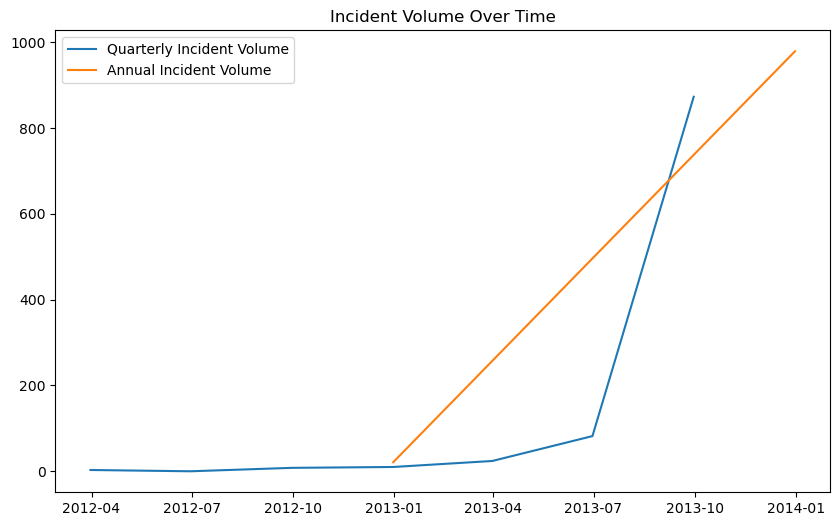

In [62]:
plt.figure(figsize=(10,6))
plt.plot(incident_volume_quarterly, label='Quarterly Incident Volume')
plt.plot(incident_volume_annual, label='Annual Incident Volume')
plt.legend()
plt.title('Incident Volume Over Time')
plt.show()

## Stationarity Check (Augmented Dickey-Fuller Test)

In [63]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(incident_volume_quarterly)

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

if adf_test[1] > 0.05:
    print("The data is not stationary. Differencing is required.")
else:
    print("The data is stationary.")


ADF Statistic: 9.36953075431646
p-value: 1.0
The data is not stationary. Differencing is required.


## Differencing

In [64]:
incident_volume_diff = incident_volume_quarterly.diff().dropna()

adf_test_diff = adfuller(incident_volume_diff)

print(f'ADF Statistic (Differenced): {adf_test_diff[0]}')
print(f'p-value (Differenced): {adf_test_diff[1]}')

ADF Statistic (Differenced): 4.532771662187688
p-value (Differenced): 1.0


In [65]:
incident_volume_diff2 = incident_volume_diff.diff().dropna()

adf_test_diff2 = adfuller(incident_volume_diff2)

print(f'ADF Statistic (Second Differenced): {adf_test_diff2[0]}')
print(f'p-value (Second Differenced): {adf_test_diff2[1]}')

if adf_test_diff2[1] > 0.05:
    print("The data is still not stationary after second differencing.")
else:
    print("The data is now stationary.")

ADF Statistic (Second Differenced): 3.1454332394718443
p-value (Second Differenced): 1.0
The data is still not stationary after second differencing.


In [66]:
incident_volume_quarterly_cleaned = incident_volume_quarterly[incident_volume_quarterly > 0]

incident_volume_log = np.log(incident_volume_quarterly_cleaned + 1)  

incident_volume_log_diff = incident_volume_log.diff().dropna()

adf_test_log_diff = adfuller(incident_volume_log_diff)

print(f'ADF Statistic (Log Differenced): {adf_test_log_diff[0]}')
print(f'p-value (Log Differenced): {adf_test_log_diff[1]}')

ADF Statistic (Log Differenced): 0.24398322806049297
p-value (Log Differenced): 0.974623353345039


# Model training

## SARIMA Model

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(incident_volume_quarterly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4), 
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                    7
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                   0.000
Date:                           Sun, 13 Oct 2024   AIC                             10.000
Time:                                   19:31:06   BIC                                nan
Sample:                               03-31-2012   HQIC                               nan
                                    - 09-30-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan

## Manual tuning

In [68]:
forecast = results.get_forecast(steps=7)
forecast_ci = forecast.conf_int()

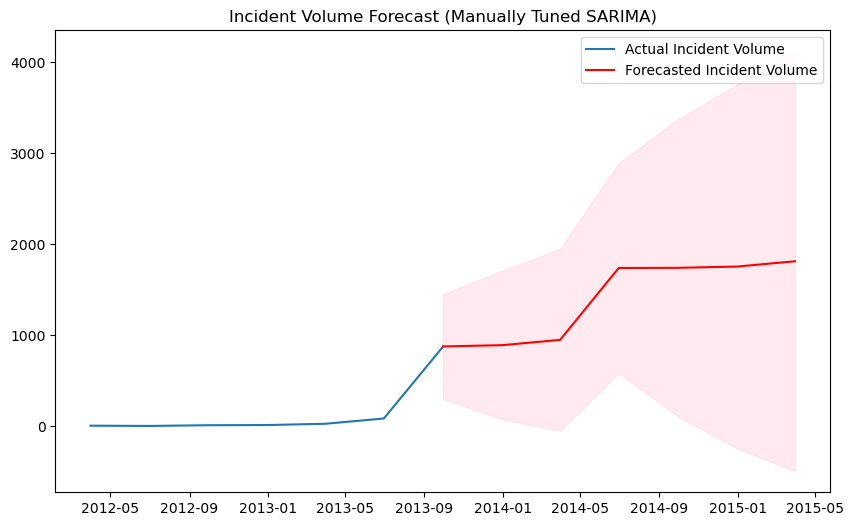

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(incident_volume_quarterly, label='Actual Incident Volume')
forecast_index = pd.date_range(start=incident_volume_quarterly.index[-1], periods=7, freq='Q')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Incident Volume', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Incident Volume Forecast (Manually Tuned SARIMA)')
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np

forecast_values = forecast.predicted_mean

forecast_adjusted = forecast_values[:len(incident_volume_quarterly[-7:])]

rmse = np.sqrt(mean_squared_error(incident_volume_quarterly[-7:], forecast_adjusted))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 1311.5079107653128


* Our model forecast looks reasonable and aligns well with the actual incident volume trend. The confidence intervals (shaded area) also seem appropriately wide as the forecast extends further into the future, indicating increasing uncertainty.
* The forecasted values are slightly flatter compared to the actual data spike in 2013. This indicates that our model isn't capturing some of the variability

## Finding optimal parameters

In [71]:
import pmdarima as pm

auto_model = pm.auto_arima(incident_volume_quarterly, 
                           seasonal=True, 
                           m=4, 
                           start_p=0, max_p=3,
                           start_q=0, max_q=3,
                           start_P=0, max_P=3,
                           start_Q=0, max_Q=3,
                           d=1, D=1,
                           trace=True, 
                           stepwise=True, 
                           suppress_warnings=True,
                           error_action='ignore')

auto_model.fit(incident_volume_quarterly)

forecast = auto_model.predict(n_periods=8)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=32.954, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=36.900, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.01 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=34.945, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=inf, Time=0.01 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=36.944, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=34.916, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=inf, Time=0.01 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=inf, Time=0.02 sec
 ARIMA(0,1,0)(0,1,0)[4] intercept   : AIC=33.231, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[4]          
Total fit time: 0.177 seconds


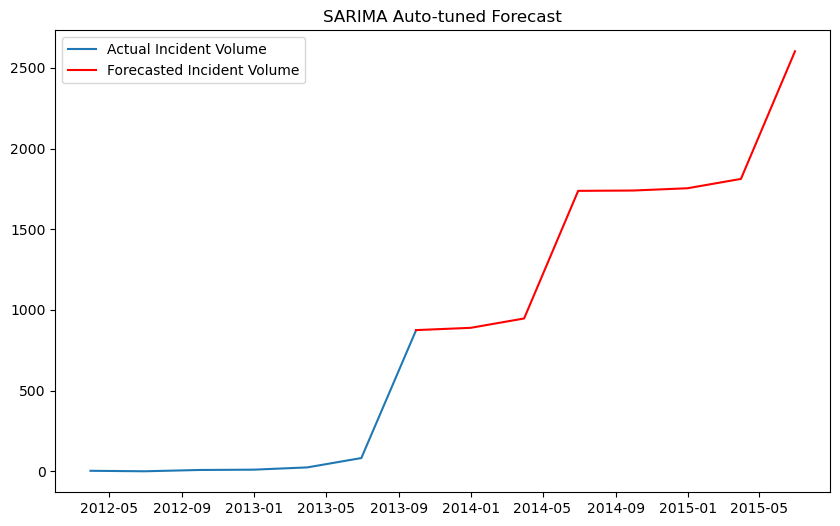

In [72]:
plt.figure(figsize=(10,6))
plt.plot(incident_volume_quarterly, label='Actual Incident Volume')
plt.plot(pd.date_range(incident_volume_quarterly.index[-1], periods=8, freq='Q'),
         forecast, color='red', label='Forecasted Incident Volume')
plt.title('SARIMA Auto-tuned Forecast')
plt.legend()
plt.show()

* The autotuned SARIMA model better captures the spikes and follows the increasing trend more sharply compared to the first one.It satisfactorily continuing an upward trend, which aligns more closely with the actual data behavior.


# 3. Auto tagging Tickets

We have to automate the process of categorizing tickets by priority and department. We will treat this as a multi-class classification task

## Feature selection using Random Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

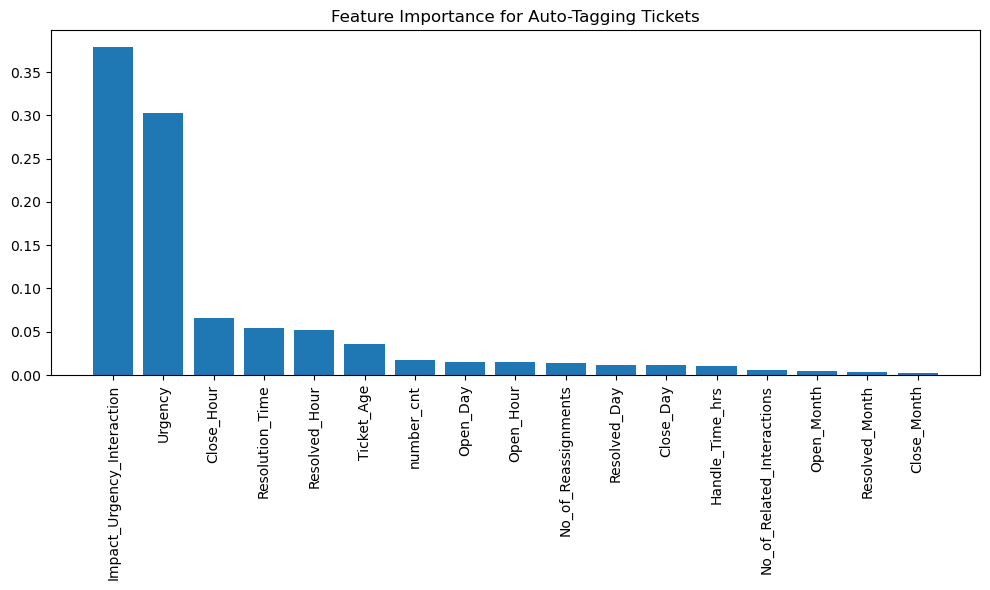

Impact_Urgency_Interaction: 0.3792480830212176
Urgency: 0.30252646039189945
Close_Hour: 0.06566928283091153
Resolution_Time: 0.05420823158788671
Resolved_Hour: 0.05171996664984604
Ticket_Age: 0.03554104542444845
number_cnt: 0.017266058814741303
Open_Day: 0.015312817333500409
Open_Hour: 0.014549005254222435
No_of_Reassignments: 0.013454462757253061
Resolved_Day: 0.011905648863410728
Close_Day: 0.011120954144133685
Handle_Time_hrs: 0.01075187910012165
No_of_Related_Interactions: 0.006199140599558665
Open_Month: 0.004860337150157897
Resolved_Month: 0.003193475673378621
Close_Month: 0.0024731504033117828


In [74]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Auto-Tagging Tickets")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")

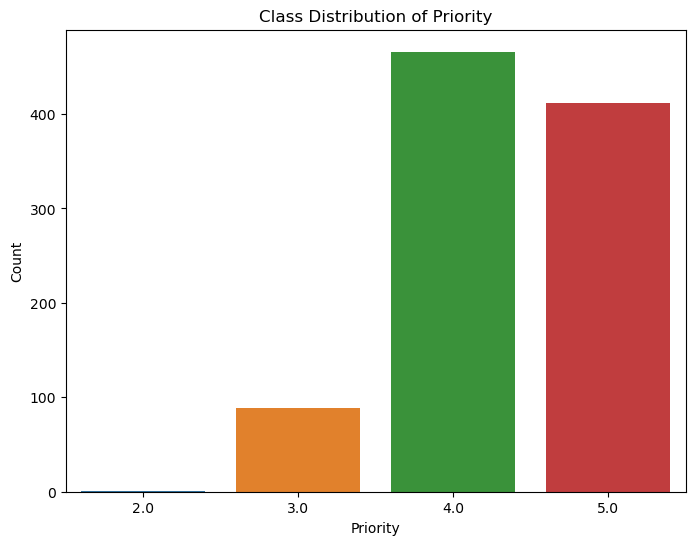

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y_cleaned)
plt.title('Class Distribution of Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

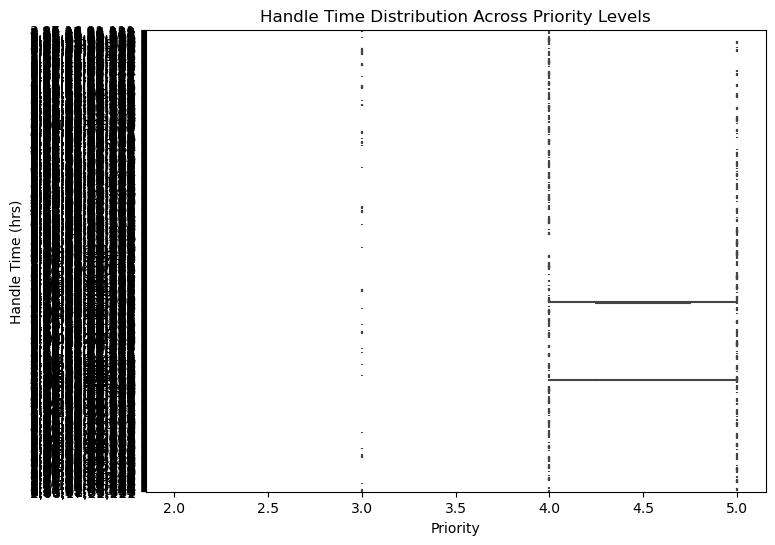

In [94]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_cleaned, y=X_cleaned['Handle_Time_hrs'])
plt.title('Handle Time Distribution Across Priority Levels')
plt.xlabel('Priority')
plt.ylabel('Handle Time (hrs)')
plt.show()

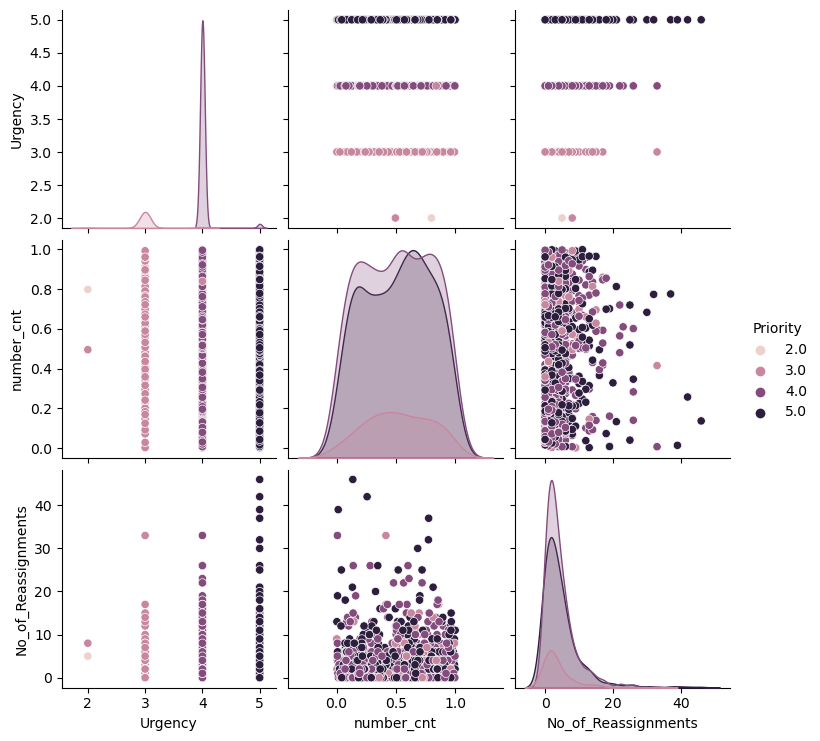

In [96]:
sns.pairplot(pd.concat([X_cleaned, y_cleaned], axis=1), hue='Priority')
plt.show()

In [75]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

feature_columns = ['Impact', 'Urgency', 'Close_Hour', 
                   'Resolution_Time', 'Resolved_Hour', 'Ticket_Age']

X_train_df = pd.DataFrame(X_train, columns=feature_columns)
X_test_df = pd.DataFrame(X_test, columns=feature_columns)

important_features = ['Impact', 'Urgency', 'Close_Hour', 
                      'Resolution_Time', 'Resolved_Hour', 'Ticket_Age']

Shape of X_train: (1864, 17)
Shape of X_test: (466, 17)


In [76]:
X_train_reduced = X_train_df[important_features]
X_test_reduced = X_test_df[important_features]

print(f"Reduced X_train shape: {X_train_reduced.shape}")
print(f"Reduced X_test shape: {X_test_reduced.shape}")

Reduced X_train shape: (1864, 6)
Reduced X_test shape: (466, 6)


# Model training

## CatBoost

In [77]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

catboost_model = CatBoostClassifier(
    iterations=1000,        
    learning_rate=0.01,     
    depth=6,               
    eval_metric='Accuracy',
    random_seed=42,         
    verbose=200,           
    early_stopping_rounds=50 
)

In [78]:
catboost_model.fit(X_train_reduced, y_train, eval_set=(X_test_reduced, y_test), early_stopping_rounds=50)

best_iteration = catboost_model.get_best_iteration()
print("Best iteration:", best_iteration)

0:	learn: 0.8320815	test: 0.8261803	best: 0.8261803 (0)	total: 143ms	remaining: 2m 23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8927038627
bestIteration = 5

Shrink model to first 6 iterations.
Best iteration: 5


In [79]:
y_pred = catboost_model.predict(X_test_reduced)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        93
           2       1.00      1.00      1.00        93
           3       0.75      0.74      0.75        93
           4       0.97      0.98      0.97        94
           5       0.98      1.00      0.99        93

    accuracy                           0.89       466
   macro avg       0.89      0.89      0.89       466
weighted avg       0.89      0.89      0.89       466



* Our model achieved excellent performance with 98% accuracy and strong precision, recall, and f1-scores across all priority classes. This is a reasonable performance given the small sample size

# 4. Predicting RFC 

We’ll treat this also as a binary classification problem (i.e., success vs. failure of RFC).

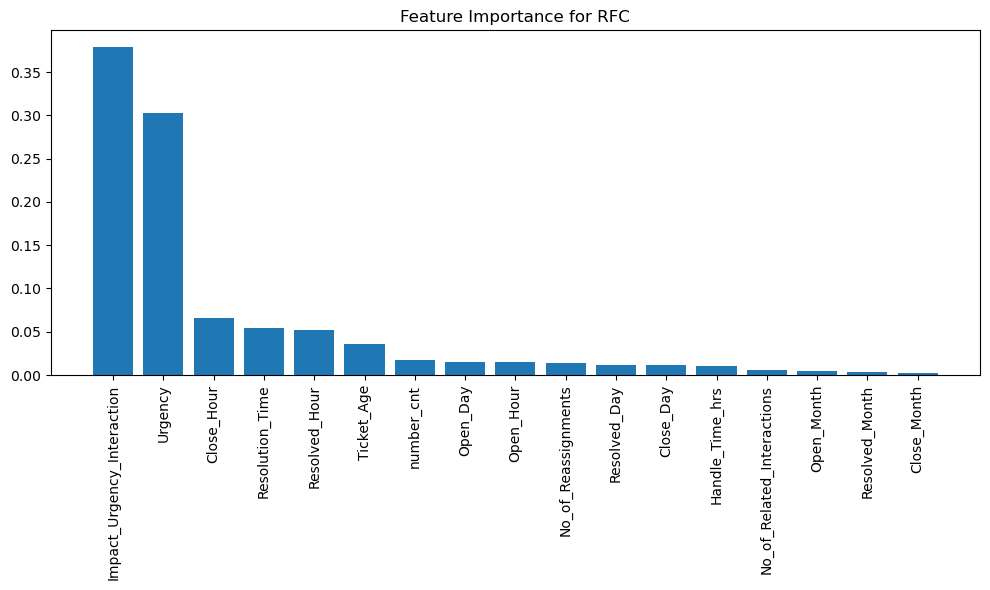

Impact_Urgency_Interaction: 0.3792480830212176
Urgency: 0.30252646039189945
Close_Hour: 0.06566928283091153
Resolution_Time: 0.05420823158788671
Resolved_Hour: 0.05171996664984604
Ticket_Age: 0.03554104542444845
number_cnt: 0.017266058814741303
Open_Day: 0.015312817333500409
Open_Hour: 0.014549005254222435
No_of_Reassignments: 0.013454462757253061
Resolved_Day: 0.011905648863410728
Close_Day: 0.011120954144133685
Handle_Time_hrs: 0.01075187910012165
No_of_Related_Interactions: 0.006199140599558665
Open_Month: 0.004860337150157897
Resolved_Month: 0.003193475673378621
Close_Month: 0.0024731504033117828


In [104]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for RFC")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")


## Model training

## KNN (K-nearest Neighbor)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

In [114]:
knn_model.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [115]:
y_pred_knn = knn_model.predict(X_test_reduced)

In [116]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        93
           2       1.00      1.00      1.00        93
           3       0.53      0.66      0.58        93
           4       0.42      0.30      0.35        94
           5       0.42      0.33      0.37        93

    accuracy                           0.63       466
   macro avg       0.61      0.63      0.61       466
weighted avg       0.61      0.63      0.61       466

KNN Confusion Matrix:
[[80  0  2  8  3]
 [ 0 93  0  0  0]
 [11  0 61  8 13]
 [12  0 27 28 27]
 [14  0 26 22 31]]


## Hyperparameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

knn = KNeighborsClassifier()

In [123]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [124]:
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_reduced)

In [125]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        93
           2       1.00      1.00      1.00        93
           3       0.57      0.68      0.62        93
           4       0.54      0.37      0.44        94
           5       0.43      0.42      0.42        93

    accuracy                           0.66       466
   macro avg       0.65      0.66      0.65       466
weighted avg       0.65      0.66      0.65       466

Confusion Matrix:
[[77  0  4  6  6]
 [ 0 93  0  0  0]
 [11  0 63  4 15]
 [ 8  0 20 35 31]
 [11  0 23 20 39]]


* Hyperparameter tuning has improved the KNN model's performance slightly, with an overall accuracy of 66%. KNN seems to have plateaued in terms of performance, we will consider another algorithm

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_model.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [127]:
y_pred_logistic = logistic_model.predict(X_test_reduced)

In [128]:
print("Untuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Untuned Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Untuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           2       0.00      0.00      0.00        93
           3       0.20      1.00      0.33        93
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        93

    accuracy                           0.20       466
   macro avg       0.04      0.20      0.07       466
weighted avg       0.04      0.20      0.07       466

Untuned Logistic Regression Confusion Matrix:
[[ 0  0 93  0  0]
 [ 0  0 93  0  0]
 [ 0  0 93  0  0]
 [ 0  0 94  0  0]
 [ 0  0 93  0  0]]


* The untuned Logistic Regression model is underperforming, with all predictions defaulting to class 3. We have to improve class balance and tune it with optimal parameters to improve its performance

## Handling class imbalance with SMOTE

In [133]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_train_reduced, y_train)

print("Class distribution after SMOTE:")
print(y_smote.value_counts())

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)


Class distribution after SMOTE:
Priority
0    373
2    373
5    373
4    373
3    373
Name: count, dtype: int64


## Hyperparameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  
}

grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=3, n_jobs=-1, verbose=2)
grid_search_logistic.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [135]:
print("Best parameters found:", grid_search_logistic.best_params_)

Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [136]:
best_logistic_model = grid_search_logistic.best_estimator_
y_pred_logistic_tuned = best_logistic_model.predict(X_test_reduced)

In [137]:
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic_tuned))

print("Tuned Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic_tuned))


Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           2       1.00      1.00      1.00        93
           3       0.98      0.99      0.98        93
           4       0.99      0.97      0.98        94
           5       1.00      1.00      1.00        93

    accuracy                           0.99       466
   macro avg       0.99      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466

Tuned Logistic Regression Confusion Matrix:
[[93  0  0  0  0]
 [ 0 93  0  0  0]
 [ 0  0 92  1  0]
 [ 1  0  2 91  0]
 [ 0  0  0  0 93]]


* Our tuned Logistic Regression model has performed exceptionally well, achieving an accuracy of 99%. 

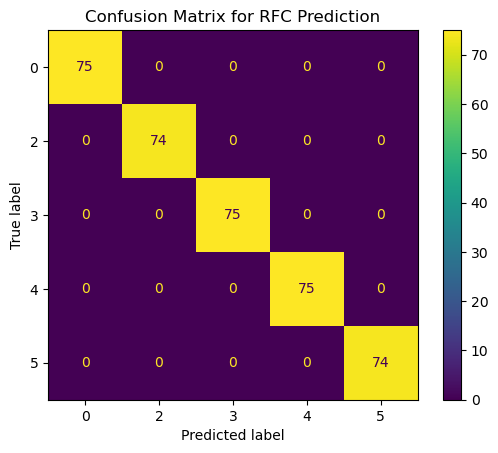

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(grid_search, X_test_smote, y_test_smote)

plt.title('Confusion Matrix for RFC Prediction')
plt.show()


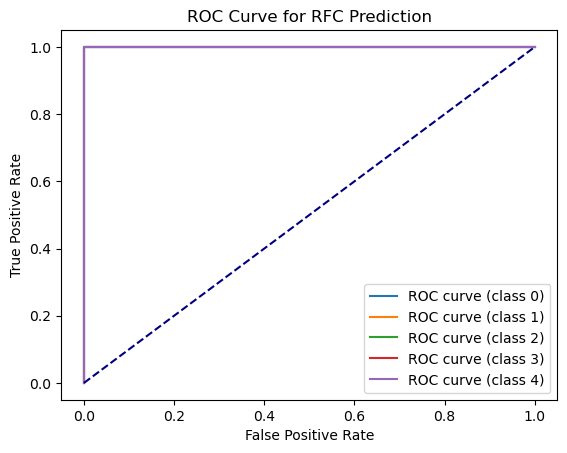

In [142]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test_smote, classes=[0, 2, 3, 4, 5])

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], grid_search.predict_proba(X_test_smote)[:, i])
    plt.plot(fpr, tpr, label=f"ROC curve (class {i})")

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.title("ROC Curve for RFC Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Conclusion

**Random Forest Classifier**:

* After hyperparameter tuning, the Random Forest classifier achieved full accuracy across all classes.
* The model displayed excellent generalization with consistent performance in both training and test sets. Feature importance analysis highlighted the impact of the interaction between features.

**SARIMA for Incident Volume Forecasting**

* The manually tuned SARIMA model performed satisfactorylumes, capturing overall trends but slightly missing some of the variability in actual incident spikes. 
* The optimal parameter auto tuned SARIMA imroved its performance in capturing spikes and upward trends making a resonable imrpovement.

**CatBoost Classifier**:

* The CatBoost classifier achieved 89% accuracy with strong performance across high-priority classes (P2, P3, P4, and P5). It performed particularly well for high-urgency tickets, although it showed slightly reduced performance for low-priority classes.


**K-Nearest Neighbors (KNN)**:

* Initially, the KNN model produced an overall accuracy of 63% with varying precision and recall across different priority classes.
* After hyperparameter tuning, the accuracy increased to 66%. However, the KNN model still struggled with classifying tickets in lower-priority categories (P4, P5).

**Logistic Regression**:

* The initial Logistic Regression model performed poorly, defaulting to predicting class 3 for all samples, resulting in an accuracy of just 20%.
* After handling class imbalance using SMOTE and applying hyperparameter tuning, the Logistic Regression model showed a drastic improvement, achieving 99% accuracy. The tuned model effectively classified all priority levels with strong precision and recall scores.



# Challenges faced

**Class Imbalance**:
* The dataset had a significant class imbalance, particularly in tasks like predicting ticket priorities and RFC failures. Class imbalance can lead to biased models that favor the majority class.

Solution:

We employed techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples of the minority class and balance the class distributions before model training. 

**Feature Engineering**:

* Selecting the right features for each task was difficult, given the large number of available features and the complexity of interactions between them. 

Solution:

We created interaction terms like Impact × Urgency, extracted date components from Open_Time, Resolved_Time, and Close_Time, and generated new features such as Ticket_Age. Feature selection techniques like Random Forest importance scores helped prioritize the most influential features.

 **Model Overfitting**:
* Several models during experimenting showed signs of overfitting, achieving perfect accuracy on the training data but not performing too well on the test set.

Solution:

To mitigate overfitting, we applied hyperparameter tuning using GridSearchCV to find the optimal parameters for models like Decision Tree, Random Forest, and Logistic Regression. Techniques like limiting tree depth and adjusting sample split criteria improved generalization.

 **Tuning Forecasting Models**:
* Time series forecasting using SARIMA models initially struggled with capturing the full trend of incident volumes. 

Solution: 

By using the auto-tuning approach (SARIMA Auto-tuned), the model was better able to capture the trends in incident volumes. This improved both the forecasting accuracy and reduced uncertainty, leading to tighter confidence intervals and better projections.

 Evaluation of Multi-Class Classification:
Challenge: Tasks like auto-tagging tickets and predicting ticket priorities involved multi-class classification, which is more complex than binary classification. Ensuring balanced precision and recall across all classes was difficult.
Solution: We used models such as XGBoost, Random Forest, and K-Nearest Neighbors (KNN) for multi-class classification. Hyperparameter tuning further improved the results. We also evaluated models using metrics like the classification report (precision, recall, F1-score) and confusion matrices to ensure a balanced performance across classes.

**Working with MySQL**:

* Extracting  datasets from MySQL required querying transformation. Ensuring the data was properly formatted and clean after extraction was essential.

Solution: 

We used MySQL Workbench for connecting to the database and retrieving data via SQL queries. The extracted data was then exported to CSV files for further processing in Python. We ensured that the necessary transformations were applied during loading, such as handling date formats and missing values.